# INX Future Inc - Employee Performance Project

## Problem Statement
INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider 
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 
years. INX human resource policies are considered as employee friendly and widely perceived as best 
practices in the industry.
Recent years, the employee performance indexes are not healthy and this is becoming a growing 
concerns among the top management. There has been increased escalations on service delivery and 
client satisfaction levels came down by 8 percentage points.
CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing 
employees as this would affect the employee morale of all the employees in general and may further 
reduce the performance. Also, the market perception best employer and thereby attracting best talents 
to join the company.
Mr. Brain decided to initiate a data science project , which analyses the current employee data and find 
the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects 
the findings of this project will help him to take right course of actions. He also expects a clear indicators 
of non performing employees, so that any penalization of non-performing employee, if required, may 
not significantly affect other employee morals.


# <font color="blue"> <u> EMPLOYEE PERFORMANCE ANALYSIS </font>

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset for analysis

df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls", index_col=0)
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


## Exploratory Data Analysis

In [3]:
df.shape

(1200, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, E1001000 to E100998
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfa

In [5]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [6]:
# Checking for Null values
df.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

####  <font color = brown> There are no null values in the dataset. </font>

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

### Checking for Department wise Performance

In [8]:

# Creating a new dataframe to analyze department wise performance
department = df.iloc[:, 5:27].copy()
department.head()

,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,,
E1001000,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
E1001006,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
E1001007,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
E1001009,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
E1001010,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


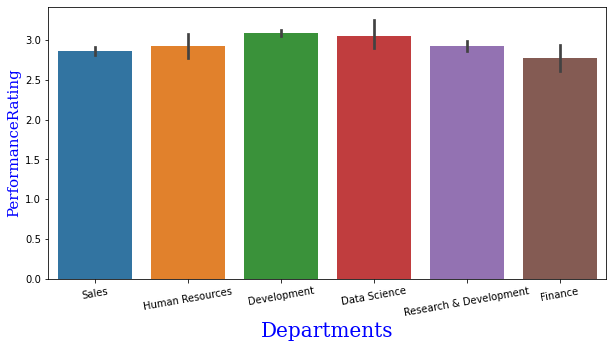

In [9]:
# Finding out the mean performance of all the department to see which has the highest performance rating
dept_performance = department.copy()
dept_performance.groupby(by=df['EmpDepartment'])['PerformanceRating'].mean

#plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df['EmpDepartment'], y=dept_performance['PerformanceRating'])
plt.xlabel("Departments", fontdict = {'family':'Serif', 'color':'blue', 'size':20})
plt.ylabel("PerformanceRating", fontdict = {'family':'Serif', 'color':'blue', 'size':15})
plt.xticks(rotation=10)
plt.show()

#### <font color=brown> 1. Development Department has the highest performance rating and the Data Science department is next to the Development Team.</font>
#### <font color=brown> 2. Finance department has the lowest performance rating.</font>

In [10]:
dept_performance.groupby(by=df['EmpDepartment'])['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [11]:
# Creating a new dataframe to analyze each department seperately
dept = pd.get_dummies(df['EmpDepartment'])
performance = pd.DataFrame(dept_performance['PerformanceRating'])
rating = pd.concat([dept, performance], axis=1)

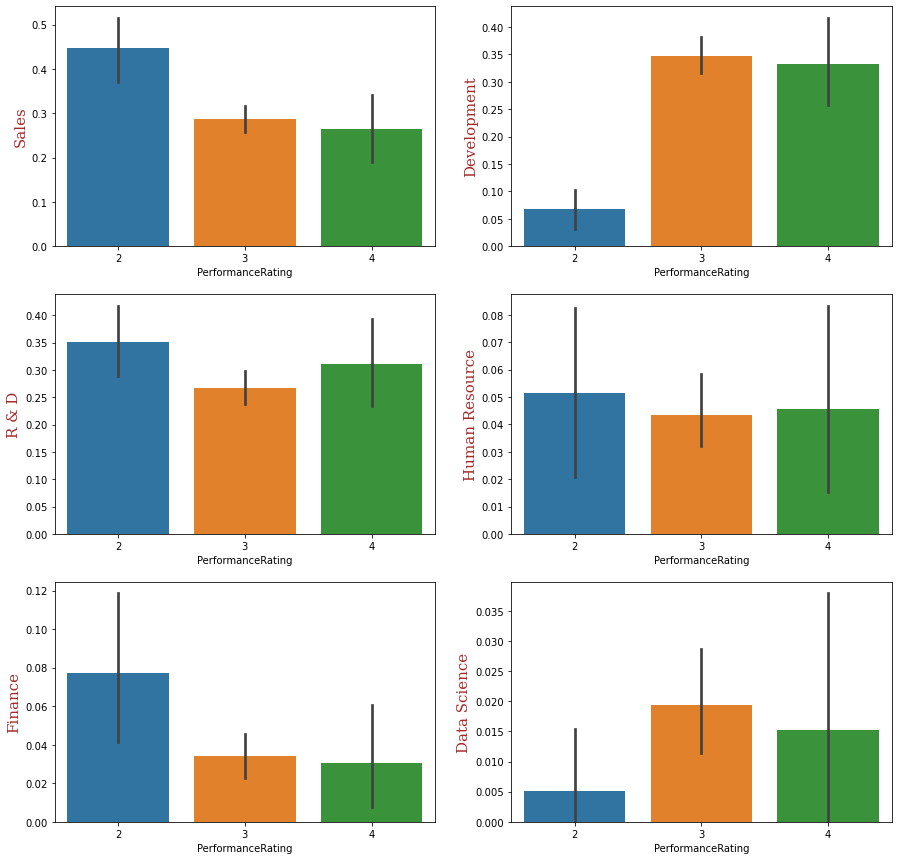

In [12]:
# Plotting the performance of each department seperately

plt.figure(figsize=(15, 15))

plt.subplot(3,2,1)
sns.barplot(rating['PerformanceRating'], rating['Sales'])
plt.ylabel("Sales", fontdict = {'family': 'Serif', 'color': 'brown', 'size': 15})

plt.subplot(3,2,2)
sns.barplot(rating['PerformanceRating'], rating['Development'])
plt.ylabel("Development", fontdict = {'family': 'Serif', 'color': 'brown', 'size': 15})

plt.subplot(3,2,3)
sns.barplot(rating['PerformanceRating'], rating['Research & Development'])
plt.ylabel("R & D", fontdict = {'family': 'Serif', 'color': 'brown', 'size': 15})

plt.subplot(3,2,4)
sns.barplot(rating['PerformanceRating'], rating['Human Resources'])
plt.ylabel("Human Resource", fontdict = {'family': 'Serif', 'color': 'brown', 'size': 15})

plt.subplot(3,2,5)
sns.barplot(rating['PerformanceRating'], rating['Finance'])
plt.ylabel("Finance", fontdict = {'family': 'Serif', 'color': 'brown', 'size': 15})

plt.subplot(3,2,6)
sns.barplot(rating['PerformanceRating'], rating['Data Science'])
plt.ylabel("Data Science", fontdict = {'family': 'Serif', 'color': 'brown', 'size': 15})
plt.show()

#### From the above plot, we can see the performance rating of each department. 

## Data Preprocessing

In [13]:
# Finding out the number of Numerical features and Categorical features

num_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])
print("There are {0} Numerical features and {1} Categorical features in the dataset".format(num_data.shape[1], cat_data.shape[1]))

There are 19 Numerical features and 8 Categorical features in the dataset


In [14]:
# Encoding all the ordinal columns

from sklearn.preprocessing import LabelEncoder
categorical_cols = cat_data.columns
label = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col:label.fit_transform(col))
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
E1001000,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
E1001006,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
E1001007,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
E1001009,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
E1001010,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


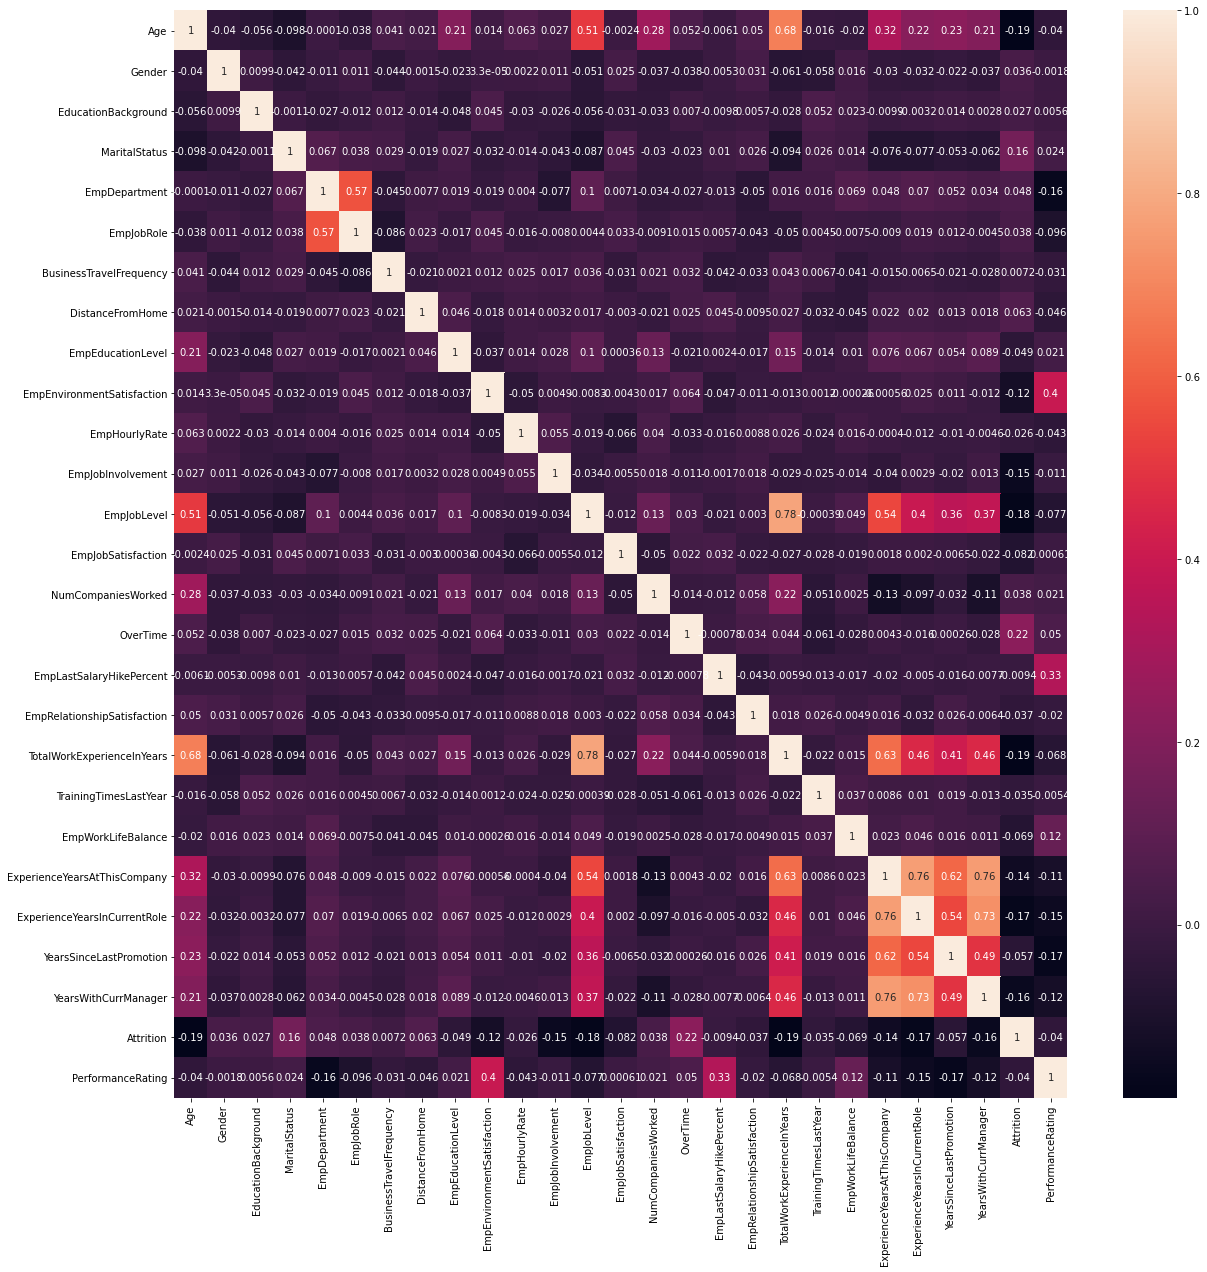

In [15]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

__From the above correlation heatmap, we infer that:__
    
    - TotalWorkExperienceInYears and EmpJobLevel is highly correlated with each other.
    - TotalWorkExperienceInYears and YearsWithCurrManager is highly correlated with each other. 
    - ExperienceYearsInCurrentRole and ExperienceYearsInCurrentRole is higly correlated with each other.
    - ExperienceYearsInCurrentRole and YearsWithCurrManager are significantly correlated with each other.

### Checking for features with high correlation to the target variable

In [16]:
indep_v = df.iloc[:, :-1]
targ_v = df.iloc[:, -1]
indep_v.corrwith(targ_v)

Age                            -0.040164
Gender                         -0.001780
EducationBackground             0.005607
MaritalStatus                   0.024172
EmpDepartment                  -0.162615
EmpJobRole                     -0.096209
BusinessTravelFrequency        -0.031025
DistanceFromHome               -0.046142
EmpEducationLevel               0.020529
EmpEnvironmentSatisfaction      0.395561
EmpHourlyRate                  -0.043116
EmpJobInvolvement              -0.010539
EmpJobLevel                    -0.076632
EmpJobSatisfaction              0.000606
NumCompaniesWorked              0.020980
OverTime                        0.050206
EmpLastSalaryHikePercent        0.333722
EmpRelationshipSatisfaction    -0.019502
TotalWorkExperienceInYears     -0.068141
TrainingTimesLastYear          -0.005443
EmpWorkLifeBalance              0.124429
ExperienceYearsAtThisCompany   -0.111645
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
YearsWithCurrMan

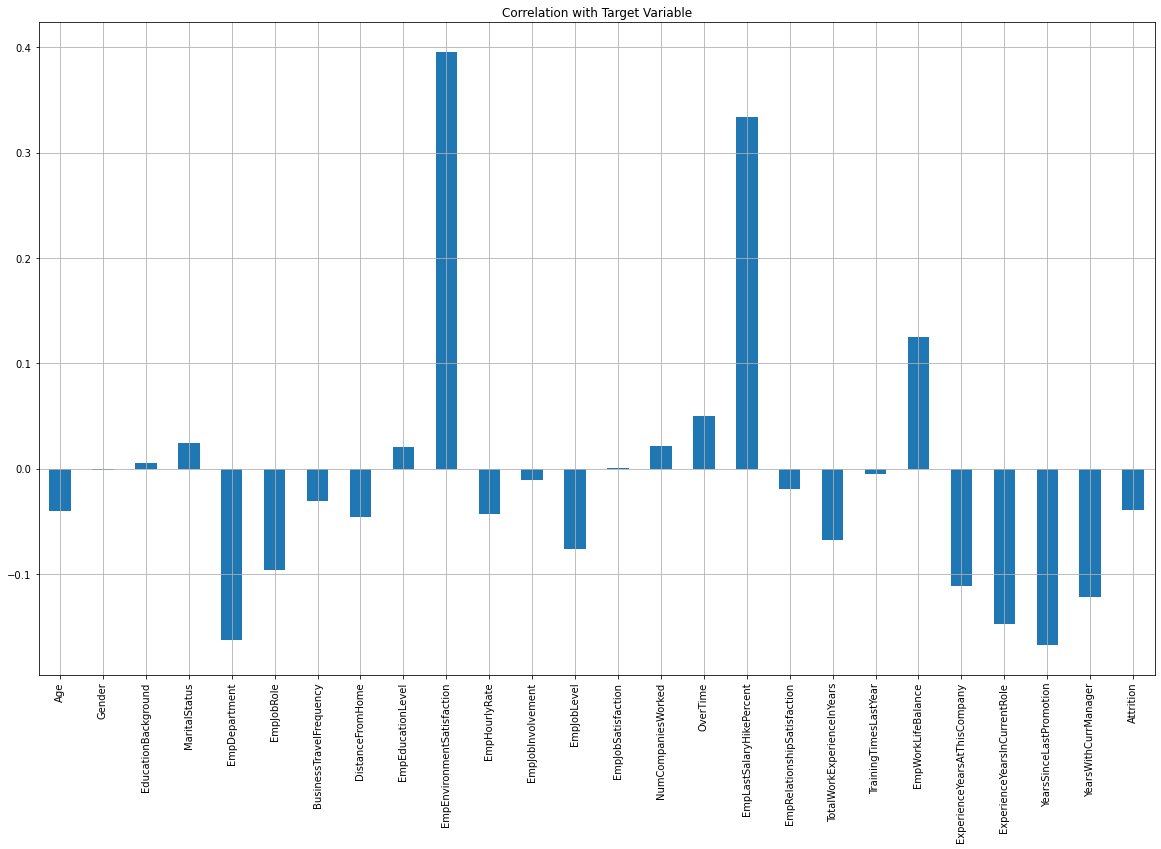

In [17]:
indep_v.corrwith(targ_v).plot(kind='bar', grid=True, figsize=(20, 12), title="Correlation with Target Variable")
plt.show()

### <u> Top 3 factors affecting employee performance are: <br>
<font color= dark blue>

1. EmpEnvironmentSatisfaction </br>
2. EmpLastSalaryHikePercent </br>
3. YearsSinceLastPromotion </font>

Features having significant correlation are EmpDepartment, EmpJobRole, EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager.


### Checking for Outliers

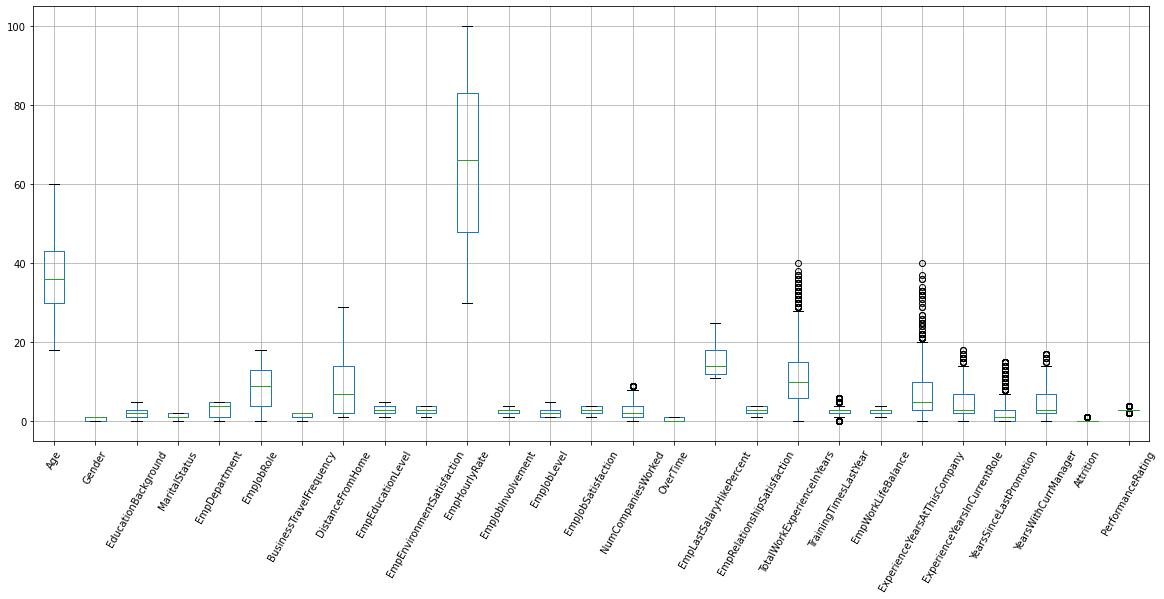

In [18]:
# Detecting the outliers for all the columns in the dataset

plt.figure(figsize=(20, 8))
df.boxplot()
plt.xticks(rotation=60)
plt.show()

__<u>The columns with outliers are:__ <br> <br>
<font color=darkviolet> __TotalWorkExperienceInYears <br> TrainingTimesLastYear <br> ExperienceYearsAtThisCompany <br> ExperienceYearsInCurrentRole <br> YearsSinceLastPromotion <br> YearsWithCurrManager__ </font> 

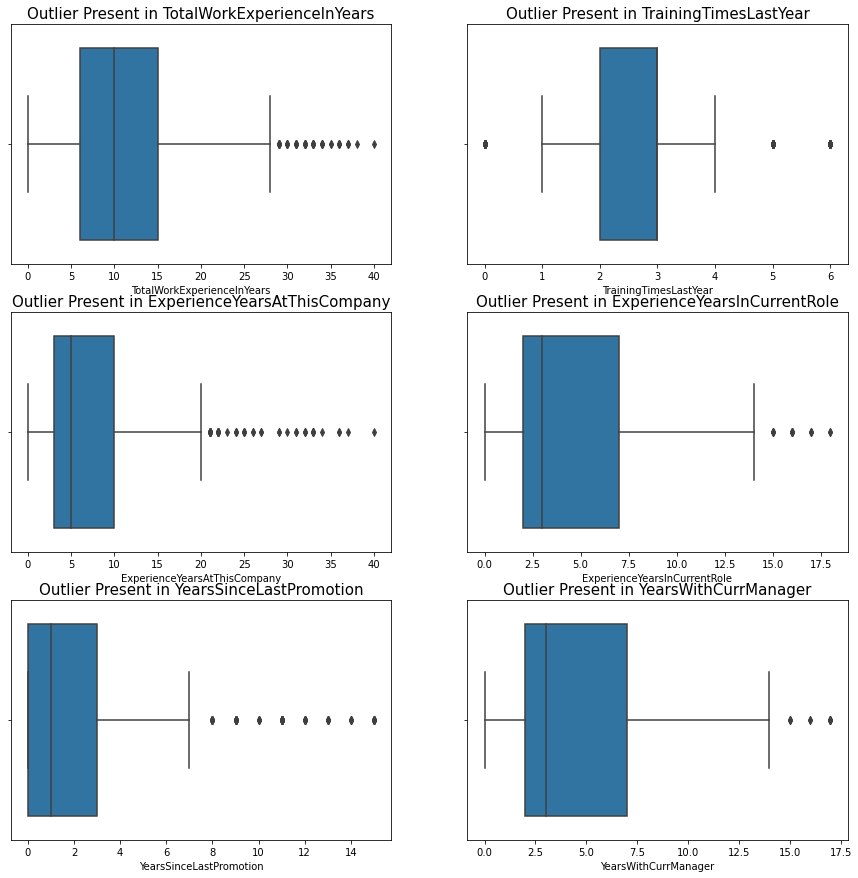

In [19]:
# Plotting the columns with outliers

plt.figure(figsize = (15, 15))
plt.subplot(3, 2, 1)
sns.boxplot(df['TotalWorkExperienceInYears'])
plt.title("Outlier Present in TotalWorkExperienceInYears", fontsize=15)

plt.subplot(3, 2, 2)
sns.boxplot(df['TrainingTimesLastYear'])
plt.title("Outlier Present in TrainingTimesLastYear", fontsize=15)

plt.subplot(3, 2, 3)
sns.boxplot(df['ExperienceYearsAtThisCompany'])
plt.title("Outlier Present in ExperienceYearsAtThisCompany", fontsize=15)

plt.subplot(3, 2, 4)
sns.boxplot(df['ExperienceYearsInCurrentRole'])
plt.title("Outlier Present in ExperienceYearsInCurrentRole", fontsize=15)

plt.subplot(3, 2, 5)
sns.boxplot(df['YearsSinceLastPromotion'])
plt.title("Outlier Present in YearsSinceLastPromotion", fontsize=15)

plt.subplot(3, 2, 6)
sns.boxplot(df['YearsWithCurrManager'])
plt.title("Outlier Present in YearsWithCurrManager", fontsize=15)

plt.show()

In [20]:
# Handling the outliers

df_n = df.copy()

# 1. TotalWorkExperienceInYears
Q1_1 = np.percentile(df_n['TotalWorkExperienceInYears'], 25, interpolation = 'midpoint')
Q3_1 = np.percentile(df_n['TotalWorkExperienceInYears'], 75, interpolation = 'midpoint')
IQR1 = Q3_1 - Q1_1
print("IQR for TotalWorkExperienceInYears: ", IQR1)

# 2. TrainingTimesLastYear
Q1_2 = np.percentile(df_n['TrainingTimesLastYear'], 25, interpolation = 'midpoint')
Q3_2 = np.percentile(df_n['TrainingTimesLastYear'], 75, interpolation = 'midpoint')
IQR2 = Q3_2 - Q1_2
print("IQR for TrainingTimesLastYear: ", IQR2)

# 3. ExperienceYearsAtThisCompany
Q1_3 = np.percentile(df_n['ExperienceYearsAtThisCompany'], 25, interpolation = 'midpoint')
Q3_3 = np.percentile(df_n['ExperienceYearsAtThisCompany'], 75, interpolation = 'midpoint')
IQR3 = Q3_3 - Q1_3
print("IQR for ExperienceYearsAtThisCompany: ", IQR3)

# 4. ExperienceYearsInCurrentRole
Q1_4 = np.percentile(df_n['ExperienceYearsInCurrentRole'], 25, interpolation = 'midpoint')
Q3_4 = np.percentile(df_n['ExperienceYearsInCurrentRole'], 75, interpolation = 'midpoint')
IQR4 = Q3_4 - Q1_4
print("IQR for ExperienceYearsInCurrentRole: ", IQR4)

# 5. YearsSinceLastPromotion
Q1_5 = np.percentile(df_n['YearsSinceLastPromotion'], 25, interpolation = 'midpoint')
Q3_5 = np.percentile(df_n['YearsSinceLastPromotion'], 75, interpolation = 'midpoint')
IQR5 = Q3_5 - Q1_5
print("IQR for YearsSinceLastPromotion: ", IQR5)

# 6. YearsWithCurrManager
Q1_6 = np.percentile(df_n['YearsWithCurrManager'], 25, interpolation = 'midpoint')
Q3_6 = np.percentile(df_n['YearsWithCurrManager'], 75, interpolation = 'midpoint')
IQR6 = Q3_6 - Q1_6
print("IQR for YearsWithCurrManager: ", IQR6)

IQR for TotalWorkExperienceInYears:  9.0
IQR for TrainingTimesLastYear:  1.0
IQR for ExperienceYearsAtThisCompany:  7.0
IQR for ExperienceYearsInCurrentRole:  5.0
IQR for YearsSinceLastPromotion:  3.0
IQR for YearsWithCurrManager:  5.0


In [21]:
# The upper and lower limt of the above features

l_limit_1 = Q1_1 - 1.5*IQR1
u_limit_1 = Q3_1 + 1.5*IQR1

l_limit_2 = Q1_2 - 1.5*IQR2
u_limit_2 = Q3_2 + 1.5*IQR2

l_limit_3 = Q1_3 - 1.5*IQR3
u_limit_3 = Q3_3 + 1.5*IQR3

l_limit_4 = Q1_4 - 1.5*IQR4
u_limit_4 = Q3_4 + 1.5*IQR4

l_limit_5 = Q1_5 - 1.5*IQR5
u_limit_5 = Q3_5 + 1.5*IQR5

l_limit_6 = Q1_6 - 1.5*IQR6
u_limit_6 = Q3_6 + 1.5*IQR6

In [22]:
# Imputing the outliers with median for the above features

df_n.loc[df_n['TotalWorkExperienceInYears'] > u_limit_1, 'TotalWorkExperienceInYears'] = np.median(df_n.TotalWorkExperienceInYears) + 1.5*IQR1
df_n.loc[df_n['TrainingTimesLastYear'] > u_limit_2, 'TrainingTimesLastYear'] = np.median(df_n.TrainingTimesLastYear) + 1.5*IQR2
df_n.loc[df_n['ExperienceYearsAtThisCompany'] > u_limit_3, 'ExperienceYearsAtThisCompany'] = np.median(df_n.ExperienceYearsAtThisCompany) + 1.5*IQR3
df_n.loc[df_n['ExperienceYearsInCurrentRole'] > u_limit_4, 'ExperienceYearsInCurrentRole'] = np.median(df_n.ExperienceYearsInCurrentRole) + 1.5*IQR4
df_n.loc[df_n['YearsSinceLastPromotion'] > u_limit_5, 'YearsSinceLastPromotion'] = np.median(df_n.YearsSinceLastPromotion) + 1.5*IQR5
df_n.loc[df_n['YearsWithCurrManager'] > u_limit_6, 'YearsWithCurrManager'] = np.median(df_n.YearsWithCurrManager) + 1.5*IQR6

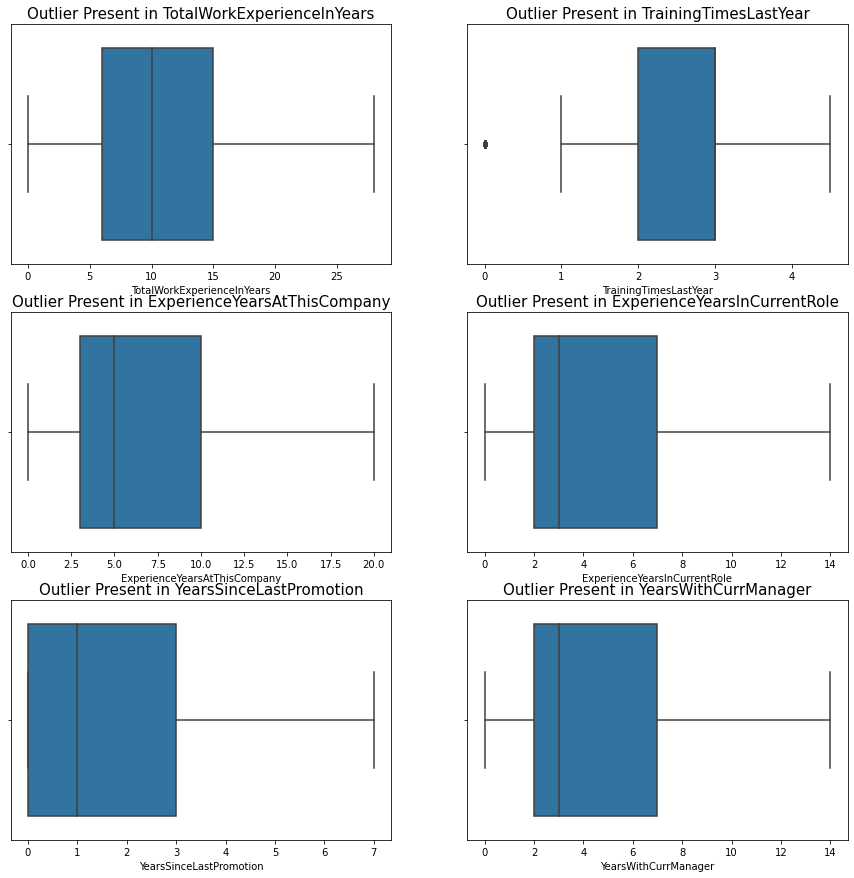

In [23]:
# Check again for outliers by plotting

plt.figure(figsize = (15, 15))
plt.subplot(3, 2, 1)
sns.boxplot(df_n['TotalWorkExperienceInYears'])
plt.title("Outlier Present in TotalWorkExperienceInYears", fontsize=15)

plt.subplot(3, 2, 2)
sns.boxplot(df_n['TrainingTimesLastYear'])
plt.title("Outlier Present in TrainingTimesLastYear", fontsize=15)

plt.subplot(3, 2, 3)
sns.boxplot(df_n['ExperienceYearsAtThisCompany'])
plt.title("Outlier Present in ExperienceYearsAtThisCompany", fontsize=15)

plt.subplot(3, 2, 4)
sns.boxplot(df_n['ExperienceYearsInCurrentRole'])
plt.title("Outlier Present in ExperienceYearsInCurrentRole", fontsize=15)

plt.subplot(3, 2, 5)
sns.boxplot(df_n['YearsSinceLastPromotion'])
plt.title("Outlier Present in YearsSinceLastPromotion", fontsize=15)

plt.subplot(3, 2, 6)
sns.boxplot(df_n['YearsWithCurrManager'])
plt.title("Outlier Present in YearsWithCurrManager", fontsize=15)

plt.show()


<font color=brown> __Outliers were replaced with median and taken for training the model. A seperate analysis considering dataset with outliers was also carried out, which resulted in decreasing the accuracy a bit.__ </font>

EmpDepartment, EmpJobRole, EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager.

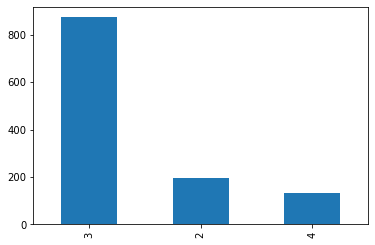

In [24]:
df['PerformanceRating'].value_counts().plot(kind='bar')
plt.show()

In [25]:
df['PerformanceRating'].value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

#### 874 employees have 3 rating whereas 194 people have 2 rating and 132 people have 4 rating. So it shows that our data is imbalanced. To overcome this, we should apply right kind of Evaluation Metrics for the model which is trained with imbalanced data.

In [26]:
X = df_n.iloc[:, [4, 5, 9, 16, 20, 21, 22, 23, 24]]
y = df_n.iloc[:, -1]

In [27]:
# Splitting into train and test for calculating the accuracy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=60)
X_train.shape

(840, 9)

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

LR_model.fit(X_train, y_train)

LogisticRegression()

## <font color = blue> Building ML Model </font>

## <font color = orange> 1. Logistic Regression </font>

In [30]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

# Training the model
LR_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Predicting the model
y_LR = LR_model.predict(X_test)

In [33]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score for Logistic Regression: ", accuracy_score(y_test, y_LR))
print("\n\nClassification Report: \n", classification_report(y_test, y_LR))
print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_LR))

Accuracy Score for Logistic Regression:  0.8361111111111111


Classification Report: 
               precision    recall  f1-score   support

           2       0.66      0.50      0.57        54
           3       0.86      0.94      0.90       267
           4       0.83      0.62      0.71        39

    accuracy                           0.84       360
   macro avg       0.78      0.68      0.72       360
weighted avg       0.83      0.84      0.83       360



Confusion Matrix: 

 [[ 27  26   1]
 [ 13 250   4]
 [  1  14  24]]


## <font color = orange> 2. XGBoost Classifier </font>

In [34]:
from xgboost import XGBClassifier
XG_model = XGBClassifier()


# Training the model
XG_model.fit(X_train,y_train)

[06:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
# Predicting the model
y_XG = XG_model.predict(X_test)

In [36]:
# Evaluating the model

print("Accuracy Score for XGBoost Classifier: ", accuracy_score(y_test, y_XG))
print("\n\nClassification Report: \n", classification_report(y_test, y_XG))
print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_XG))

Accuracy Score for XGBoost Classifier:  0.9111111111111111


Classification Report: 
               precision    recall  f1-score   support

           2       0.82      0.78      0.80        54
           3       0.93      0.95      0.94       267
           4       0.86      0.82      0.84        39

    accuracy                           0.91       360
   macro avg       0.87      0.85      0.86       360
weighted avg       0.91      0.91      0.91       360



Confusion Matrix: 

 [[ 42  12   0]
 [  8 254   5]
 [  1   6  32]]


## <font color = orange> 3. DecisionTree Classifier </font>

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Training the model
DT_model = DecisionTreeClassifier(random_state=42, splitter='best')
parameters = [{'min_samples_split':[2, 3, 4, 5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_GS = GridSearchCV(estimator=DT_model, param_grid=parameters, scoring='accuracy', cv=10)
model_GS.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [39]:
model_GS.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [40]:
# Predicting the model
y_DT = model_GS.predict(X_test)

In [41]:
# Evaluating the model

print("Accuracy Score for DecisionTree Classifier: ", accuracy_score(y_test, y_DT))
print("\n\nClassification Report: \n", classification_report(y_test, y_DT))
print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_DT))

Accuracy Score for DecisionTree Classifier:  0.9083333333333333


Classification Report: 
               precision    recall  f1-score   support

           2       0.80      0.81      0.81        54
           3       0.93      0.95      0.94       267
           4       0.91      0.77      0.83        39

    accuracy                           0.91       360
   macro avg       0.88      0.84      0.86       360
weighted avg       0.91      0.91      0.91       360



Confusion Matrix: 

 [[ 44  10   0]
 [ 11 253   3]
 [  0   9  30]]


## <font color = orange> 4. RandomForest Classifier </font>

In [42]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier(random_state=33, n_estimators=23)
parameters = [{'min_samples_split':[2, 3, 4, 5], 'criterion':['gini', 'rntropy'], 'min_samples_leaf':[1, 2, 3]}]

RF_GS = GridSearchCV(estimator=RFC_model, param_grid=parameters, scoring='accuracy', cv=10)
RF_GS.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'rntropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [43]:
RF_GS.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [44]:
# Predicting the model
y_RFC = RF_GS.predict(X_test)

In [45]:
# Evaluating the model

print("Accuracy Score for RandomForest Classifier: ", accuracy_score(y_test, y_RFC))
print("\n\nClassification Report: \n", classification_report(y_test, y_RFC))
print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_RFC))

Accuracy Score for RandomForest Classifier:  0.9222222222222223


Classification Report: 
               precision    recall  f1-score   support

           2       0.86      0.80      0.83        54
           3       0.93      0.96      0.95       267
           4       0.91      0.82      0.86        39

    accuracy                           0.92       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.92      0.92      0.92       360



Confusion Matrix: 

 [[ 43  11   0]
 [  7 257   3]
 [  0   7  32]]


## <font color = orange> 5. Naive Bayes Bernoulli </font>

In [46]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB()
NB_model.fit(X_train, y_train)

BernoulliNB()

In [47]:
# Predicting the model
y_NB = NB_model.predict(X_test)

In [48]:
# Evaluating the model

print("Accuracy Score for NaiveBayes Bernouli: ", accuracy_score(y_test, y_NB))
print("\n\nClassification Report: \n", classification_report(y_test, y_NB))
print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_NB))

Accuracy Score for NaiveBayes Bernouli:  0.7833333333333333


Classification Report: 
               precision    recall  f1-score   support

           2       0.65      0.57      0.61        54
           3       0.80      0.94      0.87       267
           4       0.00      0.00      0.00        39

    accuracy                           0.78       360
   macro avg       0.48      0.50      0.49       360
weighted avg       0.69      0.78      0.73       360



Confusion Matrix: 

 [[ 31  23   0]
 [ 16 251   0]
 [  1  38   0]]


## <font color = orange> 6. Support Vector Machine </font>

In [49]:
# Training the model
from sklearn.svm import SVC
SVC_model = SVC(kernel='rbf', C = 0.01)
SVC_model.fit(X_train, y_train)

SVC(C=0.01)

In [50]:
# Predicting the model
y_SVC = SVC_model.predict(X_test)

In [51]:
# Evaluating the model

print("Accuracy Score for SVM Model: ", accuracy_score(y_test, y_SVC))
print("\n\nClassification Report: \n", classification_report(y_test, y_SVC))
print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_SVC))

Accuracy Score for SVM Model:  0.7416666666666667


Classification Report: 
               precision    recall  f1-score   support

           2       0.00      0.00      0.00        54
           3       0.74      1.00      0.85       267
           4       0.00      0.00      0.00        39

    accuracy                           0.74       360
   macro avg       0.25      0.33      0.28       360
weighted avg       0.55      0.74      0.63       360



Confusion Matrix: 

 [[  0  54   0]
 [  0 267   0]
 [  0  39   0]]


## <font color = orange> 7. KNN Model </font>

In [52]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [55]:


# Predicting the model
y_predict_knn = KNN_model.predict(X_test)

In [56]:
# Predicting the model
y_knn = KNN_model.predict(X_test)

In [57]:
# Evaluating the model

print("Accuracy Score for KNN Model: ", accuracy_score(y_test, y_knn))
print("\n\nClassification Report: \n", classification_report(y_test, y_knn))
print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_knn))

Accuracy Score for KNN Model:  0.8555555555555555


Classification Report: 
               precision    recall  f1-score   support

           2       0.72      0.57      0.64        54
           3       0.87      0.97      0.91       267
           4       1.00      0.49      0.66        39

    accuracy                           0.86       360
   macro avg       0.86      0.68      0.74       360
weighted avg       0.86      0.86      0.84       360



Confusion Matrix: 

 [[ 31  23   0]
 [  9 258   0]
 [  3  17  19]]


In [58]:
# Accuracy score of all the models

print("\n\nAccuracy Score: \n")
print("Logistic Regression: ", accuracy_score(y_test, y_LR))
print("XGBoost Classifier: ", accuracy_score(y_test, y_XG))
print("DecisionTree Classifier: ", accuracy_score(y_test, y_DT))
print("RandomForest Classifier: ", accuracy_score(y_test, y_RFC))
print("NaiveBayes Bernouli: ", accuracy_score(y_test, y_NB))
print("SVM Model: ", accuracy_score(y_test, y_SVC))
print("KNN Model: ", accuracy_score(y_test, y_knn))



Accuracy Score: 

Logistic Regression:  0.8361111111111111
XGBoost Classifier:  0.9111111111111111
DecisionTree Classifier:  0.9083333333333333
RandomForest Classifier:  0.9222222222222223
NaiveBayes Bernouli:  0.7833333333333333
SVM Model:  0.7416666666666667
KNN Model:  0.8555555555555555


#### Conclusion:

#### In the research conducted using the dataset for Employee Performance Analysis which contains 1200 instances and 27 attributes, implementing 7 ML Algorithms, we concluded that RandomForest Classifier using GridSearchCV can give highest accuracy ie., 92% and XGBOOST Classifier can give accuracy of 91%. So for this dataset, RandomForest Classifier and XGBoost Classifier are the best models for predicting the performance of the employees.

#### The experiment is carried out using 5 more model and were trained and tested with maximum accuracy of DecisionTree Classifier: 90%, KNN Model: 85%, Logistic Regression:  83%, NaiveBayes Bernouli:  78% and SVM Model:  74%.